## XGBoost

XGBoost models represent all problems as a regression predictive modeling problem that takes numerical values as input. Your data must be prepared into the expected format:

- encode string output variables for classification.
- prepare categorical input variables (ie one hot encoding)
- handle missing data with XGBoost


### Simple Case: numeric inputs with categorical outputs

meaning of input numbers in the iris dataset

   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm

In [18]:
import pandas
import numpy
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

%matplotlib inline

In [77]:
# load data from http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data 
data = pandas.read_csv('../data/iris.data', header=None)
print(type(data))
dataset = data.values # convert pandas dataframe to <class 'numpy.ndarray'>
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [78]:
# split data into X and y
X = dataset[:,0:4]
Y = dataset[:,4]

In [79]:
# print every 30th data point
print(type(X), X.shape)
print(X[::30])
print(Y[::30])

<class 'numpy.ndarray'> (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.8 3.1 1.6 0.2]
 [5.0 2.0 3.5 1.0]
 [5.5 2.6 4.4 1.2]
 [6.9 3.2 5.7 2.3]]
['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica']


In [80]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
print(label_encoded_y[::30])

[0 0 1 1 2]


## Handling new unseen categories

If you use this label_encoder to convert categories to integer labels for the input to the
model, if at test time you encounter a category that is not seen in the training set, the label_encoder can crash, in the future, you may need to custom design a 2 way dictionary
that can handle the mapping of number:category that handles new unseen categories. 

In [81]:
print("expected shape of X and Y", X.shape, label_encoded_y.shape)
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    label_encoded_y, 
                                                                    test_size=test_size, 
                                                                    random_state=seed)

expected shape of X and Y (150, 4) (150,)


In [82]:
# fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


In [83]:
# make predictions for test data
y_pred = model.predict(X_test)
print(y_pred[::5])
predictions = [round(value) for value in y_pred]
print(predictions[::5])
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[2 0 2 2 1 2 2 0 2 0]
[2, 0, 2, 2, 1, 2, 2, 0, 2, 0]
Accuracy: 92.00%


## Feature Importance

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model.

For more technical information on how feature importance is calculated in boosted decision trees, see Section 10.13.1 “Relative Importance of Predictor Variables” of [The Elements of Statistical Learning: Data Mining, Inference, and Prediction](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)



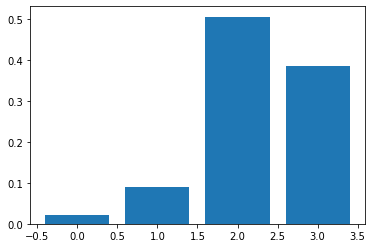

In [85]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

plotting feature importance is a builtin function of xgboost

f0: sepal length in cm

f1: sepal width in cm

f2: petal length in cm

f3: petal width in cm

we see tha petal length in cm, f2, is the most important feature, this makes sense, it is the most linearly separable feature as well

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_dataset_scatterplot.svg/800px-Iris_dataset_scatterplot.svg.png" width=400 height=400>

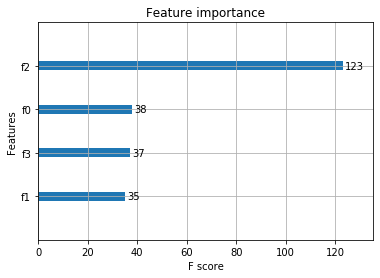

In [89]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

## Categorical inputs to Categorical ouputs

input features of Breast Cancer Data Set

1. Class: no-recurrence-events, recurrence-events
2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
3. menopause: lt40, ge40, premeno.
4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59
5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39
6. node-caps: yes, no.
7. deg-malig: 1, 2, 3.
8. breast: left, right.
9. breast-quad: left-up, left-low, right-up,	right-low, central.
10. irradiat:	yes, no.

In [48]:
# load data
data = pandas.read_csv('../data/breast-cancer.data', header=None)
dataset = data.values

# split data into X and y
X = dataset[:,0:9]
Y = dataset[:,9]

print(type(X), X.shape)
print(X[0])
X = X.astype(str) # deg-malig: int -> str


print(X[0])
print(Y[::50])

<class 'numpy.ndarray'> (286, 9)
['no-recurrence-events' '30-39' 'premeno' '30-34' '0-2' 'no' 3 'left'
 'left_low']
['no-recurrence-events' '30-39' 'premeno' '30-34' '0-2' 'no' '3' 'left'
 'left_low']
['no' 'no' 'no' 'no' 'no' 'no']


XGBoost may assume that encoded integer values for each input variable have an ordinal relationship. For example that ‘left-up’ encoded as 0 and ‘left-low’ encoded as 1 for the breast-quad variable have a meaningful relationship as integers. In this case, this assumption is untrue.

Instead, we must map these integer values onto new binary variables, one new variable for each categorical value.

left-up, left-low, right-up, right-low, central ->

1,0,0,0,0

0,1,0,0,0

0,0,1,0,0

0,0,0,1,0

0,0,0,0,1

using the OneHotEncoder class in scikit-learn

We can one hot encode each feature after we have label encoded it. First we must transform the feature array into a 2-dimensional NumPy array where each integer value is a feature vector with a length 1. We can then create the OneHotEncoder and encode the feature array.



In [49]:
# what are all the unique categories of the first feature?
print(set(X[:,0]))
label_encoder = LabelEncoder()
feature = label_encoder.fit_transform(X[:,0])
# they have now be encoded ordinally, but they are not ordinal
print(set(feature), feature.shape)
feature = feature.reshape(X.shape[0], 1) # add dimension: (286,) -> (286, 1) 
print(feature[:2], feature.shape)
onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
feature = onehot_encoder.fit_transform(feature)
print(feature[:2])

{'no-recurrence-events', 'recurrence-events'}
{0, 1} (286,)
[[0]
 [0]] (286, 1)
[[1. 0.]
 [1. 0.]]


In [50]:
from sklearn.preprocessing import OneHotEncoder

encoded_x = None
for i in range(0, X.shape[1]):
    label_encoder = LabelEncoder()
    feature = label_encoder.fit_transform(X[:,i])
    feature = feature.reshape(X.shape[0], 1)
    onehot_encoder = OneHotEncoder(sparse=False, categories='auto')
    feature = onehot_encoder.fit_transform(feature)
    if encoded_x is None:
        encoded_x = feature
    else:
        encoded_x = numpy.concatenate((encoded_x, feature), axis=1)
        
print("X shape: : ", encoded_x.shape)

X shape: :  (286, 43)


In [51]:
encoded_x[::90] # The input consists of each features one hot encoding concatenated together 

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.]])

In [52]:
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
print(label_encoded_y[::90])

[0 0 1 0]


In [35]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(encoded_x, 
                                                    label_encoded_y, 
                                                    test_size=test_size, 
                                                    random_state=seed)

In [37]:
# fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
Accuracy: 71.58%


##  Missing Data 

XGBoost was designed to work with sparse data, like the one hot encoded data from the previous section, and missing data is handled the same way that sparse or zero values are handled, by minimizing the loss function. Section 3.4 “Sparsity-aware Split Finding” in the paper [XGBoost: A Scalable Tree Boosting System](https://arxiv.org/pdf/1603.02754.pdf)

The Horse Colic dataset is a good example to demonstrate this capability as it contains a large percentage of missing data, approximately 30%.

1: surgery?
1 = Yes, it had surgery
2 = It was treated without surgery

2: Age
1 = Adult horse
2 = Young (< 6 months)

3: Hospital Number
- numeric id
- the case number assigned to the horse (may not be unique if the horse is treated > 1 time)

4: rectal temperature
- linear
- in degrees celsius.
- An elevated temp may occur due to infection.
- temperature may be reduced when the animal is in late shock
- normal temp is 37.8
- this parameter will usually change as the problem progresses, eg. may start out normal, then become elevated because of the lesion, passing back through the normal range as the horse goes into shock

21: abdominocentesis appearance
- a needle is put in the horse's abdomen and fluid is obtained from
the abdominal cavity
- possible values:
1 = clear
2 = cloudy
3 = serosanguinous
- normal fluid is clear while cloudy or serosanguinous indicates a compromised gut

22: abdomcentesis total protein
- linear
- the higher the level of protein the more likely it is to have a compromised gut. Values are in gms/dL

23: outcome
- what eventually happened to the horse?
- possible values:
1 = lived
2 = died
3 = was euthanized

24: surgical lesion?
- retrospectively, was the problem (lesion) surgical?
- all cases are either operated upon or autopsied so that this value and the lesion type are always known
- possible values:
1 = Yes
2 = No



In [71]:
# load data
dataframe = pandas.read_csv("../data/horse-colic.data", delim_whitespace=True, header=None)
dataset = dataframe.values
print(" num features: ", len(dataset[0]))
print(dataset[::91])
# these features are kinda weird, they can be 0 or large integers
print(set(dataset[:,26]))
print(set(dataset[:,25]))
print(set(dataset[:,24]))
# the last feature is binary 
print(set(dataset[:,27]))

 num features:  28
[['2' 1 530101 '38.50' '66' '28' '3' '3' '?' '2' '5' '4' '4' '?' '?' '?'
  '3' '5' '45.00' '8.40' '?' '?' '2' 2 11300 0 0 2]
 ['2' 1 529461 '40.30' '114' '36' '3' '3' '1' '2' '2' '3' '3' '2' '1'
  '7.00' '1' '5' '57.00' '8.10' '3' '4.50' '2' 1 3205 0 0 1]
 ['1' 1 5279822 '38.00' '?' '24' '3' '3' '6' '2' '5' '?' '4' '1' '1' '?'
  '?' '?' '68.00' '7.80' '?' '?' '2' 1 2205 0 0 2]
 ['1' 1 528638 '37.70' '120' '28' '3' '3' '3' '1' '5' '3' '3' '1' '1' '?'
  '?' '?' '65.00' '7.00' '3' '?' '2' 1 4205 0 0 1]]
{0, 2209}
{0, 6112, 3111, 7111, 3112, 1400}
{0, 2305, 5124, 3205, 31110, 3207, 5000, 3209, 11400, 4111, 400, 2322, 41110, 5400, 4122, 4124, 2205, 2206, 2207, 2208, 2209, 11300, 3111, 3112, 7209, 9000, 3115, 300, 3113, 12208, 3124, 9400, 3133, 2111, 2112, 2113, 6209, 7111, 3400, 7113, 4300, 2124, 8400, 3025, 5205, 5206, 1111, 6111, 6112, 1124, 3300, 7400, 8300, 4205, 4206, 4207, 11124, 21110, 5111, 1400, 2300}
{1, 2}


In [72]:
# split data into X and y
X = dataset[:,0:27]
Y = dataset[:,27]
# print every 30th data point
print(type(X), X.shape)
print(X[0])
print(Y[0])

<class 'numpy.ndarray'> (300, 27)
['2' 1 530101 '38.50' '66' '28' '3' '3' '?' '2' '5' '4' '4' '?' '?' '?'
 '3' '5' '45.00' '8.40' '?' '?' '2' 2 11300 0 0]
2


The missing data is marked with a question mark character (‘?’). We can change these missing values to the sparse value expected by XGBoost which is the value zero (0).

Because the missing data was marked as strings, those columns with missing data were all loaded as string data types. We can now convert the entire set of input data to numerical values.

For this dataset, the numeric data start at 1 and not 0, so zeros do not occur unless inthe case there is no data such as in features 25,26,27. There are 2 ways to handle the missing data:

You can assign the mean value to them

`imputer = Imputer()`
`X = imputer.fit_transform(X)`

or you can assign them to 0

`X[X == '?'] = 0`

In [73]:
# set missing values to 0
X[X == '?'] = 0
# convert to numeric
X = X.astype('float32')

print(type(X), X.shape)
print(X[0])
print(Y[0])

<class 'numpy.ndarray'> (300, 27)
[2.00000e+00 1.00000e+00 5.30101e+05 3.85000e+01 6.60000e+01 2.80000e+01
 3.00000e+00 3.00000e+00 0.00000e+00 2.00000e+00 5.00000e+00 4.00000e+00
 4.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 3.00000e+00 5.00000e+00
 4.50000e+01 8.40000e+00 0.00000e+00 0.00000e+00 2.00000e+00 2.00000e+00
 1.13000e+04 0.00000e+00 0.00000e+00]
2


In [74]:
# encode Y class values as integers 0, 1 instead of 1, 2
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [75]:
# split data into train and test sets
print(X.shape, label_encoded_y.shape)
print(X[0])
print(label_encoded_y[0])
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                    label_encoded_y, 
                                                    test_size=test_size, 
                                                    random_state=seed)

(300, 27) (300,)
[2.00000e+00 1.00000e+00 5.30101e+05 3.85000e+01 6.60000e+01 2.80000e+01
 3.00000e+00 3.00000e+00 0.00000e+00 2.00000e+00 5.00000e+00 4.00000e+00
 4.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 3.00000e+00 5.00000e+00
 4.50000e+01 8.40000e+00 0.00000e+00 0.00000e+00 2.00000e+00 2.00000e+00
 1.13000e+04 0.00000e+00 0.00000e+00]
1


In [76]:
# fit model no training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
Accuracy: 82.83%


## Feature Selection: Pima Indians Diabetes Database

The diagnostic, binary-valued variable investigated is whether the
patient shows signs of diabetes according to World Health Organization
criteria (i.e., if the 2 hour post-load plasma glucose was at least 
200 mg/dl at any survey  examination or if found during routine medical
care).   The population lives near Phoenix, Arizona, USA.

Results: Their ADAP algorithm makes a real-valued prediction between
0 and 1.  This was transformed into a binary decision using a cutoff of 
0.448.  Using 576 training instances, the sensitivity and specificity
of their algorithm was 76% on the remaining 192 instances.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

7. For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function (represents ancestor’s history)
   8. Age (years)
   9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   
   0            500
   
   1            268

In [176]:

dataset = numpy.loadtxt('../data/pima-indians-diabetes.csv', delimiter=",")
#dataframe = pandas.read_csv('../data/pima-indians-diabetes.csv', delimiter=",")
#dataset = dataframe.values
print("majority classifier", round(500/(500+268),3))
print(dataset[::100])
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

majority classifier 0.651
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01 1.000e+00]
 [1.000e+00 1.630e+02 7.200e+01 0.000e+00 0.000e+00 3.900e+01 1.222e+00
  3.300e+01 1.000e+00]
 [0.000e+00 1.130e+02 8.000e+01 1.600e+01 0.000e+00 3.100e+01 8.740e-01
  2.100e+01 0.000e+00]
 [0.000e+00 1.670e+02 0.000e+00 0.000e+00 0.000e+00 3.230e+01 8.390e-01
  3.000e+01 1.000e+00]
 [4.000e+00 9.500e+01 6.400e+01 0.000e+00 0.000e+00 3.200e+01 1.610e-01
  3.100e+01 1.000e+00]
 [2.000e+00 1.170e+02 9.000e+01 1.900e+01 7.100e+01 2.520e+01 3.130e-01
  2.100e+01 0.000e+00]
 [1.000e+00 1.080e+02 8.800e+01 1.900e+01 0.000e+00 2.710e+01 4.000e-01
  2.400e+01 0.000e+00]
 [2.000e+00 1.220e+02 7.600e+01 2.700e+01 2.000e+02 3.590e+01 4.830e-01
  2.600e+01 0.000e+00]]


In [168]:
X[:,3][X[:,3]==0.]=numpy.around(numpy.mean(X[:,3]!=0.))
X[:,4][X[:,4]==0.]=numpy.around(numpy.mean(X[:,4]!=0.))
X[::100]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 1.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 1.630e+02, 7.200e+01, 1.000e+00, 1.000e+00, 3.900e+01,
        1.222e+00, 3.300e+01],
       [0.000e+00, 1.130e+02, 8.000e+01, 1.600e+01, 1.000e+00, 3.100e+01,
        8.740e-01, 2.100e+01],
       [0.000e+00, 1.670e+02, 0.000e+00, 1.000e+00, 1.000e+00, 3.230e+01,
        8.390e-01, 3.000e+01],
       [4.000e+00, 9.500e+01, 6.400e+01, 1.000e+00, 1.000e+00, 3.200e+01,
        1.610e-01, 3.100e+01],
       [2.000e+00, 1.170e+02, 9.000e+01, 1.900e+01, 7.100e+01, 2.520e+01,
        3.130e-01, 2.100e+01],
       [1.000e+00, 1.080e+02, 8.800e+01, 1.900e+01, 1.000e+00, 2.710e+01,
        4.000e-01, 2.400e+01],
       [2.000e+00, 1.220e+02, 7.600e+01, 2.700e+01, 2.000e+02, 3.590e+01,
        4.830e-01, 2.600e+01]])

In [180]:
# split data into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    Y, 
                                                                    test_size=0.33, 
                                                                    random_state=1)
# fit model on all training data
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


In [181]:
# Fit model using each importance as a threshold
from numpy import sort
from sklearn.feature_selection import SelectFromModel
print("model.feature_importances_", model.feature_importances_)
print("majority classifier",1 - numpy.mean(y_test))
sort_idx = numpy.argsort(-model.feature_importances_) # sort in decreasing order
best_feature = sort_idx[0]  
X_train_build = X_train[:,best_feature].reshape(X_train.shape[0], 1)
X_test_build = X_test[:,best_feature].reshape(X_test.shape[0], 1)
for idx in list(sort_idx):
    if idx != best_feature:
        X_train_build = numpy.concatenate((X_train_build, 
                                           X_train[:,idx].reshape(X_train.shape[0], 1)), 
                                           axis=1)
        X_test_build = numpy.concatenate((X_test_build, 
                                          X_test[:,idx].reshape(X_test.shape[0], 1)), 
                                          axis=1)
    # train model
    selection_model = xgboost.XGBClassifier()
    selection_model.fit(X_train_build, y_train)
    # eval model
    y_pred = selection_model.predict(X_test_build)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("num_features=%d, Accuracy: %.2f%%" % ( X_train_build.shape[1], 
                                                   accuracy*100.0))

model.feature_importances_ [0.10440847 0.21552509 0.09496948 0.08279032 0.106089   0.15713796
 0.09531099 0.14376874]
majority classifier 0.6377952755905512
num_features=1, Accuracy: 70.47%
num_features=2, Accuracy: 70.87%
num_features=3, Accuracy: 74.80%
num_features=4, Accuracy: 72.83%
num_features=5, Accuracy: 77.17%
num_features=6, Accuracy: 76.38%
num_features=7, Accuracy: 77.17%
num_features=8, Accuracy: 75.59%
